# Tutorial 3 - Resampling methods and Data Visualization

*Written and revised by Jozsef Arato, Mengfan Zhang, Dominik Pegler*  
Computational Cognition Course, University of Vienna  
https://github.com/univiemops/tewa1-computational-cognition

---

## This week's lab:

We will introduce you to three common resampling methods: **Bootstrapping**, **Permutation test**, and **Cross validation**, with data visualization of them. Resampling techniques are powerful tools for estimating the sampling distribution of a statistic, making inferences about population parameters, validating models, and other situations where traditional parametric assumptions are not met or when exact analytical solutions are impractical. 

**Learning goals:** \
When finishing this tutorial, you should ...
* perform a bootstrap and estimate the variance 
* perform a permutation test and determine the statistical significance of models
* split data into training and test sets and perform cross-validation

**Estimated time to complete:** 2 hours \
**Deadline:** Next Monday, 23:59


# 1. Sampling

Sampling is the process of selecting a subset of values or items from a larger population. Python has various libraries to do sampling, a commonly used one is `numpy.random` module. Let's import the libraries first and have a look at some useful functions.

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
my_array = np.arange(20)
sample = np.random.choice(my_array)
print(sample)

5


# 2.1 Bootstrapping

Imagine you conducted an experiment in which you collected reaction time data from two small groups of participants under different manipulations. You compare the means of these two groups and find a difference, and you think the difference is due to the manipulation. However, it is also possible that one or two participants in one group didn't sleep well last night, weren't in good health, weren't paying attention, or some other random thing that you can't control. One thing you can do is repeat the experiment (maybe over and over again) to try to rule out the effect of random things. Fortunately, you have another much easier and less expensive option, which is to bootstrap. 

Bootstrapping is a resampling technique used to estimate the sampling distribution of almost any statistic by repeatedly sampling with replacement from the observed data. It gives you a sense of what might happen if you repeated an experiment many times, and allows you to assess the variability and uncertainty associated with the statistic. Now let's perform a bootstrapping procedure step by step:

In [4]:
# Suppose we have some reaction data from an experiment
np.random.seed(213)
rt_data = np.random.randint(150, 600, 20)
exp_mean = rt_data.mean()
print("Experimental reaction time data:", "\n", rt_data)
print("Mean of experimental reaction time", "\n", exp_mean)

Experimental reaction time data: 
 [449 378 502 151 449 383 509 337 460 388 217 175 239 484 599 298 318 412
 298 504]
Mean of experimental reaction time 
 377.5


In [5]:
# Perform bootstrapping sampling
n_samples = 100  # perform the sampling 100 times, it works like repeating the experiment 100 times
bootstrap_means = np.zeros(n_samples)

for i in range(n_samples):
    # Step 1: Sampling with replacement to create a bootstrap sample
    current_bootstrap_sample = np.random.choice(
        rt_data, size=rt_data.size, replace=True
    )

    # Step 2: Calculate the statistic of interest for each sample
    current_mean = np.mean(current_bootstrap_sample)

    # Step 3: Store each sample statistic for estimating the sampling distribution
    bootstrap_means[i] = current_mean

# Step 4: Drawing Inferences
estimated_mean = np.mean(bootstrap_means)
estimated_std = np.std(bootstrap_means)

print("Estimated bootstrap mean :", estimated_mean)
print("Standard error of the estimate:", estimated_std)

Estimated bootstrap mean : 373.4334999999999
Standard error of the estimate: 27.008783807309797


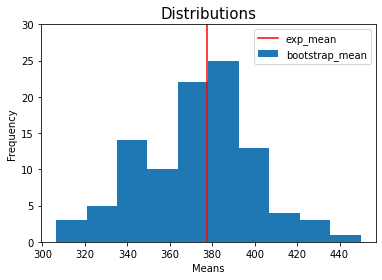

In [6]:
# Plot the sampling distribution of the statisitc
plt.hist(bootstrap_means)
plt.axvline(x=exp_mean, color="r", label="exp_mean")
plt.ylim((0, 30))
plt.xlabel("Means")
plt.ylabel("Frequency")
plt.title("Distributions", fontsize=15)
plt.legend(["exp_mean", "bootstrap_mean"])
plt.show()

Great! We just did our first bootstrap! In real practice, instead of writing a loop, Python `scipy` library provides the `bootstrap` function to do it easily:

In [22]:
from scipy.stats import bootstrap

bootstrap_out = bootstrap(data=(rt_data,), statistic=np.mean, n_resamples=100, axis=0)
print(bootstrap_out)

BootstrapResult(confidence_interval=ConfidenceInterval(low=317.90633648541245, high=424.13581305585086), bootstrap_distribution=array([378.8 , 383.  , 397.8 , 361.4 , 401.45, 367.9 , 373.85, 366.25,
       376.85, 410.1 , 386.8 , 375.65, 381.8 , 317.95, 412.5 , 341.3 ,
       356.15, 379.9 , 399.55, 388.55, 362.7 , 363.5 , 387.85, 352.9 ,
       420.15, 338.15, 357.9 , 432.8 , 406.  , 394.05, 399.9 , 391.65,
       361.  , 423.85, 364.4 , 379.85, 399.7 , 364.15, 370.6 , 317.85,
       417.1 , 338.1 , 381.8 , 372.6 , 382.8 , 380.05, 413.95, 389.25,
       381.  , 381.6 , 405.  , 368.5 , 344.45, 365.25, 359.8 , 356.8 ,
       380.35, 352.9 , 357.85, 386.6 , 352.65, 377.75, 411.  , 424.95,
       396.6 , 325.85, 380.7 , 311.2 , 365.3 , 331.15, 358.8 , 354.25,
       354.95, 373.85, 326.55, 384.8 , 369.15, 406.2 , 381.2 , 335.8 ,
       377.4 , 382.1 , 355.15, 367.2 , 390.6 , 389.4 , 425.1 , 425.75,
       385.8 , 379.35, 403.9 , 390.55, 407.3 , 347.85, 365.05, 413.2 ,
       377.6 , 347.9

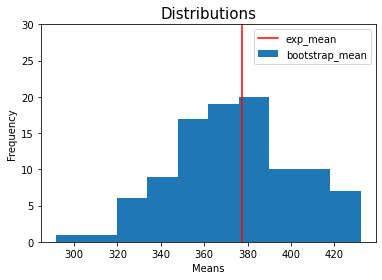

In [20]:
# Plot the sampling distribution of the statisitc
plt.hist(bootstrap_out.bootstrap_distribution)
plt.axvline(x=exp_mean, color="r", label="exp_mean")
plt.ylim((0, 30))
plt.xlabel("Means")
plt.ylabel("Frequency")
plt.title("Distributions", fontsize=15)
plt.legend(["exp_mean", "bootstrap_mean"])
plt.show()

Could you do a bootstrap with 50 samples, calculate the standard deviation and store it in the variable "bootstrap_std"? It doesn't matter if you use the loop or the function.

this tutorial is working on permutation test(also called randomization test), to compare data from 2 independent groups (as the independent samples t-test)


as discussed on Monday, permutation test is a way of randomly resampling the data, to create a distibution that would be expected based on chance (or under the null hypothesis)


we compare set of data sets of average reaction times (as treatment and control group)

## The two datasets
- Below are the reaction time data for the treatment (data1) and control (data2) groups.
- between subject design

In [ ]:
data1 = np.array(
    [
        444.48703626,
        420.71413104,
        482.04432447,
        380.46896668,
        420.56864234,
        474.09130417,
        414.9748433,
        450.15423802,
        436.53977461,
        500.12705411,
        405.00705696,
        419.3141794,
        460.46096974,
        450.54358948,
        420.93431563,
        467.40481135,
        510.84094939,
        482.61924772,
        480.32638462,
        510.76756724,
    ]
)

data2 = np.array(
    [
        420.1243685,
        501.25211241,
        454.37132587,
        600.39850065,
        501.79657108,
        481.94197109,
        469.51703441,
        449.82747137,
        450.98838458,
        477.15878941,
        570.00039675,
        460.18766471,
        432.70480616,
        480.38394358,
        478.46070285,
        485.71067427,
        487.91937261,
        505.86604195,
        495.8480102,
        480.9547509,
    ]
)

## Data exploration
first step is to explore the two data sets:

1. print the mean for both groups
2. print the SD for both group
3. make a plot with two subplots, with a histogram for both groups
4. calculat the difference of means between the groups, and store it, called TrudeDiff


In [ ]:
print("number of participants", len(data1 + data2))
print("average treatment reaction time", data1.mean())
print("average control reaction time", data2.mean())
print("standard deviations", np.round(np.std(data1), 2), np.round(np.std(data2), 2))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data1)
plt.xlabel("reaction time (ms)")
plt.title("Treatment")
plt.subplot(1, 2, 2)
plt.hist(data2)
plt.xlabel("reaction time (ms)")
plt.title("Control")

true_diff = data1.mean() - data2.mean()

## Visualize the means with errorbars showing the standard deviaton

In [ ]:
plt.figure()
plt.errorbar(0, np.mean(data1), np.std(data1), marker="o", markersize=10)
plt.errorbar(1, np.mean(data2), np.std(data2), marker="o", markersize=10)
plt.ylabel("reaction time (ms)")
plt.xlim([-1, 2])
plt.xticks(np.arange(2), ["Treatment", "Control"])

it is easy to do some more advanced visualization with matplotlib

In [ ]:
plt.boxplot([data1, data2])
plt.ylabel("reaction time (ms)")
plt.xticks(np.arange(1, 3), ["Treatment", "Control"])

## The core of the permutation test

now lets try to implement the permutations test

for these the main steps are:
 1. create a combined array containing the 2 data sets.
 2. randomly permute the combined array
 3. from the permuted array, select 2  groups (same size as the original groups)  
 4. calculate the mean difference between the 2 permuted groups
 5. store the permuted mean difference in a 1d array or a list
 6. repeat steps 2-5 2000 times


In [ ]:
def perm_test(arr_1, arr_2, n_repetitions):
    res = []

    for i in range(n_repetitions):
        # 1
        arr_comb = np.concatenate((arr_1, arr_2))
        # 2
        arr_perm = np.random.permutation(arr_comb)
        # 3
        arr_split_1 = arr_perm[0 : int(len(arr_comb) / 2)]
        arr_split_2 = arr_perm[int(len(arr_comb) / 2) :]
        # 4
        mean_delta_perm = arr_split_1.mean() - arr_split_2.mean()
        # 5
        res.append(mean_delta_perm)

    return res


# 6 run function with 2000 repetitions

n_repetitions = 1_000_000

res = perm_test(data1, data2, n_repetitions=n_repetitions)

try to make your solution general -- that could work with data of any size and any permutations

## Evaluation of results
Once this is done, calculate the p value of the true difference based on the permutation  
(using np.abs and np.sum)


hint: calculate how often chance produced a greater difference than the true difference


In [ ]:
permuted_p = np.sum(np.abs(res > np.abs(true_diff))) / n_repetitions
print(permuted_p)

## Visualization
Once this is done we can evaluate of the result of the permutations visually

1. make a histogram, of the permuted differences.
2. mark it on the histogram with a vertical line, where the true difference falls.  with plt.plot 
in this case, you use plt.plot([xstart,xend],[ystart,yend],color='k')  -
if you add the same value for xstart and xend, we get a vertical line

3. using np.percentile, calculte thresholds for p<.05, and mark it with a vertical dashed lines (as in 3)





In [ ]:
plt.hist(res, bins=10000)
plt.axvline(true_diff, color="red")
plt.axvline(np.percentile(res, 5), color="black", linestyle="dashed")
plt.axvline(np.percentile(res, 95), color="black", linestyle="dashed");

## Compare to *t*-test
compare the result above with an independen sample t-test
for this, we import scipy.stats below, so it can be accessed as stats.ttest_ind

In [ ]:
from scipy import stats

stats.ttest_ind(data1, data2)

## Alternative for *t*-test 
pingouin library

since this is not part of colab by default, we have to install it with !pip

In [ ]:
#!pip install pingouin
import pingouin as pg

In [ ]:
pg.ttest(data1, data2, paired=False)

## Homework 1

### Functions
now we are ready with the permutation test, now "re-cycle" your code from above, to make it into a function below.

This function should take 2 inputs (the 2 data-sets),
do the permuations as above, and return the permuted p-value.

Remember you can choose whatever variable names within the function, but best practice is not to use the same ones as for the code outside the function!

the function shoud not rely on any of the variables that are defined outside of the function: you can verify this by copy-pasting it into a new notebook and test it with some new data.




In [ ]:
def my_perm_test(#your code):
  #your code 
  #your code 
  return #your code 

 verify that your function works, with comparing it with your previous code
 

In [ ]:
# YOUR CODE

## now lets try the permutation test on some new data

In [ ]:
x1 = np.array(
    [
        200.48703626,
        420.71413104,
        482.04432447,
        380.46896668,
        420.56864234,
        474.09130417,
        414.9748433,
        450.15423802,
        436.53977461,
        500.12705411,
        405.00705696,
        419.3141794,
        460.46096974,
        450.54358948,
        420.93431563,
        467.40481135,
        510.84094939,
        482.61924772,
        480.32638462,
        860.56161,
    ]
)

x2 = np.array(
    [
        420.1243685,
        501.25211241,
        454.37132587,
        900.39850065,
        501.79657108,
        481.94197109,
        469.51703441,
        449.82747137,
        450.98838458,
        477.15878941,
        570.00039675,
        460.18766471,
        432.70480616,
        480.38394358,
        478.46070285,
        485.71067427,
        487.91937261,
        505.86604195,
        495.8480102,
        1500.5446,
    ]
)

explore these data-sets with histograms

now, we can easily use the function to compare other data-sets

for example X1 and X2 above
compare the result with the t-test

In [ ]:
my_perm_test(x1, x2)

log transform data before running the statistics

a common way to deal with data with large variability (eg: free viewing looking times) is to do a log transform.

1. make a scatter plot with the original data on the X and the raw data on the Y axis 
add both datasets to the same figure (using different colors)


2. run the permutation test and the t-test for the log-transformed datasets





### optional function parameters

until now we fixed the number of permutations in MyPermTest

make a new function, MyPermTestv2, with the only difference that there is a 3rd input variable, that controls the number of permutations


In [ ]:
def my_perm_test_v2(#your code):
    #your code
#your code

once this is done, make a visualization of how the permuted p value changes as you change the number of permutations


1. use `my_perm_test_v2`, to compare data1 and data2, with the number of permutations changing from 50 to 3000 in steps of 200  (use np.arange and a for cycle), at each step you only need to calcualte the permuted p-value
2. make a scatter plot, to visualize what you have calculate in 1.: the number of permutations on the x axis and the permuted p-value on the y-axis
3. add a horizontal line, that crosses the whole figure and shows the p-value obtained by  t-test

In [ ]:
# your code
# your code
# your code

### Bootstrapped confidence interval 

calculate the bootstrapped confidence interval for the mean of Data 1 and Data 2 with 2000 bootstraps. 
You can use np.random.choice ot perform sampling with replacemen- check the slided for more info.

after you have the 2000 sample means, you can use np.percentile to find the 95,99% confidence intervals

visualize what you found: if you use errobar, not that you can define positive and negative error differently (as a boostrapped confidence interval is not symmetric)

## Homework 2 (advanced)


### Data simulation and analysis

test permutation test and compare with the t-test with largely unequal sample sizes 

imagine a scenario where you research reaction times in a rare patient group
,so that you only have 5 patients.. obviously it is easier to get a large number of control participants, lets say 50

set mean=600 for patiens with SD of 100 (normal distribution)
set mean=550 for control with SD of 100 (uniform distribution)

1. make 2 data sets, patient group with N=5, the control group with N=50, 
2. compare them with the t-test
3. compare them using the permutation test
4. repeat this process multiple times, and systematically compare (with for cycle and visualization) the similarity between permuation and t-test result


